In [80]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset (replace 'air_quality_data.csv' with your dataset)
df = pd.read_csv(r"C:\Users\DMV_11.csv")
df

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
0,Ahmedabad,2015-01-01,NaN,NaN,0.92,18.22,17.15,NaN,0.92,27.64,133.36,0.00,0.02,0.00,NaN,NaN
1,Ahmedabad,2015-01-02,NaN,NaN,0.97,15.69,16.46,NaN,0.97,24.55,34.06,3.68,5.50,3.77,NaN,NaN
2,Ahmedabad,2015-01-03,NaN,NaN,17.40,19.30,29.70,NaN,17.40,29.07,30.70,6.80,16.40,2.25,NaN,NaN
3,Ahmedabad,2015-01-04,NaN,NaN,1.70,18.48,17.97,NaN,1.70,18.59,36.08,4.43,10.14,1.00,NaN,NaN
4,Ahmedabad,2015-01-05,NaN,NaN,22.10,21.42,37.76,NaN,22.10,39.33,39.31,7.01,18.89,2.78,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29526,Visakhapatnam,2020-06-27,15.02,50.94,7.68,25.06,19.54,12.47,0.47,8.55,23.30,2.24,12.07,0.73,41.0,Good
29527,Visakhapatnam,2020-06-28,24.38,74.09,3.42,26.06,16.53,11.99,0.52,12.72,30.14,0.74,2.21,0.38,70.0,Satisfactory
29528,Visakhapatnam,2020-06-29,22.91,65.73,3.45,29.53,18.33,10.71,0.48,8.42,30.96,0.01,0.01,0.00,68.0,Satisfactory
29529,Visakhapatnam,2020-06-30,16.64,49.97,4.05,29.26,18.80,10.03,0.52,9.84,28.30,0.00,0.00,0.00,54.0,Satisfactory


In [81]:
# Replace NaN values with the mean of the column
df.fillna(df.mean(), inplace=True)
df

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
0,Ahmedabad,2015-01-01,67.450578,118.127103,0.92,18.22,17.15,23.483476,0.92,27.64,133.36,0.00000,0.020000,0.000000,166.463581,NaN
1,Ahmedabad,2015-01-02,67.450578,118.127103,0.97,15.69,16.46,23.483476,0.97,24.55,34.06,3.68000,5.500000,3.770000,166.463581,NaN
2,Ahmedabad,2015-01-03,67.450578,118.127103,17.40,19.30,29.70,23.483476,17.40,29.07,30.70,6.80000,16.400000,2.250000,166.463581,NaN
3,Ahmedabad,2015-01-04,67.450578,118.127103,1.70,18.48,17.97,23.483476,1.70,18.59,36.08,4.43000,10.140000,1.000000,166.463581,NaN
4,Ahmedabad,2015-01-05,67.450578,118.127103,22.10,21.42,37.76,23.483476,22.10,39.33,39.31,7.01000,18.890000,2.780000,166.463581,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29526,Visakhapatnam,2020-06-27,15.020000,50.940000,7.68,25.06,19.54,12.470000,0.47,8.55,23.30,2.24000,12.070000,0.730000,41.000000,Good
29527,Visakhapatnam,2020-06-28,24.380000,74.090000,3.42,26.06,16.53,11.990000,0.52,12.72,30.14,0.74000,2.210000,0.380000,70.000000,Satisfactory
29528,Visakhapatnam,2020-06-29,22.910000,65.730000,3.45,29.53,18.33,10.710000,0.48,8.42,30.96,0.01000,0.010000,0.000000,68.000000,Satisfactory
29529,Visakhapatnam,2020-06-30,16.640000,49.970000,4.05,29.26,18.80,10.030000,0.52,9.84,28.30,0.00000,0.000000,0.000000,54.000000,Satisfactory


In [82]:
# Extract the year from the 'Date' column
df['Year'] = pd.to_datetime(df['Date']).dt.year

In [83]:
# Resample the data to yearly averages
df_resampled = df.groupby('Year').mean()

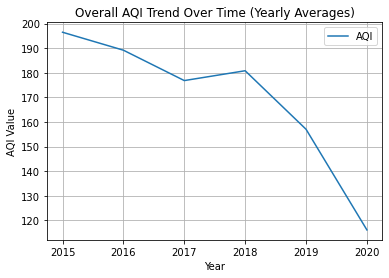

In [84]:
# Create a line plot to visualize the overall AQI trend over time (resampled)

plt.plot(df_resampled.index, df_resampled['AQI'],  label='AQI')
plt.xlabel('Year')
plt.ylabel('AQI Value')
plt.title('Overall AQI Trend Over Time (Yearly Averages)')
plt.legend()
plt.grid(True)
plt.show()

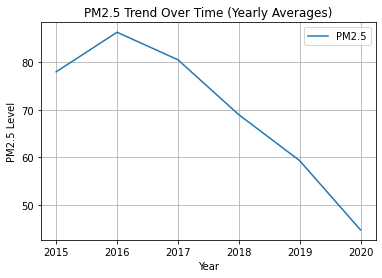

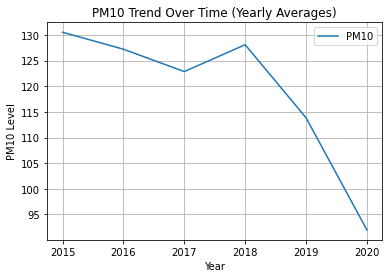

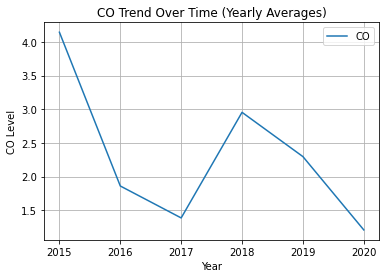

In [85]:
# Plot individual pollutant levels using the resampled data
pollutants = ['PM2.5', 'PM10', 'CO']

for pollutant in pollutants:
    plt.plot(df_resampled.index, df_resampled[pollutant], label=pollutant)
    plt.xlabel('Year')
    plt.ylabel(f'{pollutant} Level')
    plt.title(f'{pollutant} Trend Over Time (Yearly Averages)')
    plt.legend()
    plt.grid(True)
    plt.show()

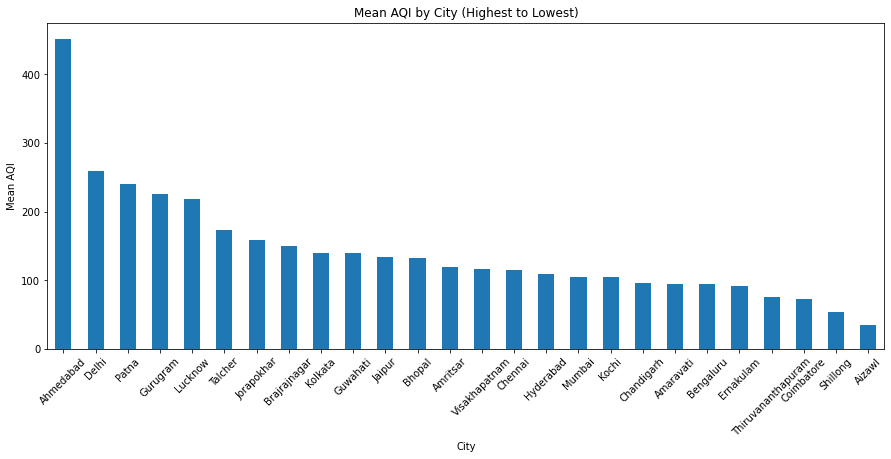

In [86]:
plt.figure(figsize=(15, 6))
city_aqi.plot(kind='bar')
plt.xlabel('City')
plt.ylabel('Mean AQI')
plt.title('Mean AQI by City (Highest to Lowest)')
plt.xticks(rotation=45)
plt.show()
